# Import Libraries And Dataset

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
### Load the Dataset
file_path = 'processed_space_traffic.csv'
data = pd.read_csv(file_path)
print(data.head())

   Traffic_Density  Year  Month  Day  Hour  Peak_Time_Hour  Location_Encoded  \
0               17  2024     10   21    21              15                 1   
1               21  2024     10   11     5              15                 4   
2               88  2024     10   29    13               6                 4   
3               65  2024     10   24     8               8                 2   
4                9  2024     10   23    17               6                 0   

   Object_Type_Asteroid Mining Ship  Object_Type_Manned Spacecraft  \
0                             False                          False   
1                             False                          False   
2                             False                          False   
3                             False                          False   
4                             False                          False   

   Object_Type_Satellite  Object_Type_Scientific Probe  \
0                  False                

# **Experimenting with Different Train-Test Split Ratios for Linear Regression**

In [16]:
# Experiment with different train-test split ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]
results = []

for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Store results
    results.append({
        'Split Ratio': ratio,
        'R-Squared': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

    print(f"Split Ratio: {ratio}, R-Squared: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

# Visualize R-squared, MAE, MSE, and RMSE for different split ratios
results_df = pd.DataFrame(results)

Split Ratio: 0.1, R-Squared: -0.0268, MAE: 26.4224, MSE: 914.0072, RMSE: 30.2326
Split Ratio: 0.2, R-Squared: -0.0067, MAE: 24.6388, MSE: 806.1163, RMSE: 28.3922
Split Ratio: 0.3, R-Squared: -0.0152, MAE: 23.6841, MSE: 767.3780, RMSE: 27.7016
Split Ratio: 0.4, R-Squared: -0.0187, MAE: 24.2348, MSE: 800.0542, RMSE: 28.2852


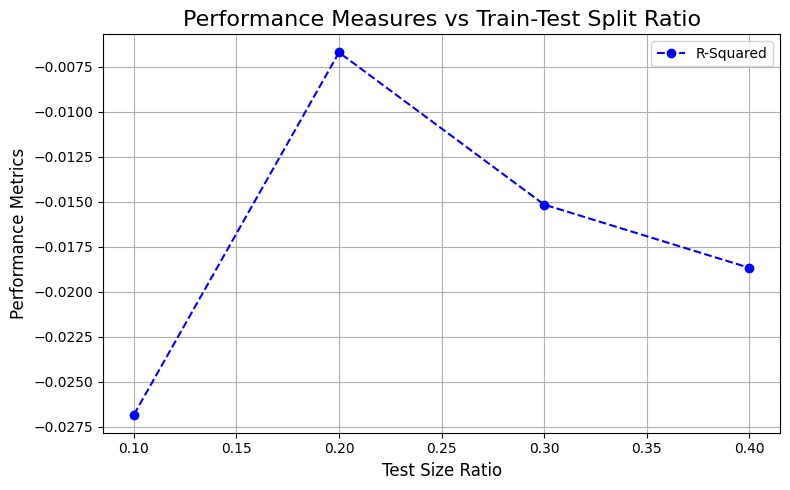

In [17]:
# Plot R-Squared vs Split Ratio
plt.figure(figsize=(8, 5))
plt.plot(results_df['Split Ratio'], results_df['R-Squared'], marker='o', linestyle='--', color='blue', label='R-Squared')
plt.title('Performance Measures vs Train-Test Split Ratio', fontsize=16)
plt.xlabel('Test Size Ratio', fontsize=12)
plt.ylabel('Performance Metrics', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Best performance at 0.20:

The peak R-squared value is observed at a 20% test size, meaning the model explains variance in the data best with this split.

Decline with larger or smaller splits:

R-squared decreases as the test size moves away from 0.20, indicating the model struggles to generalize well with smaller (0.10) or larger (0.40) test datasets.

Insight:

A 20% test size appears to provide the optimal balance for training and testing, likely due to adequate data for both phases.
The low R-squared values (negative) overall suggest the model may not be fitting the data well. Improvements such as feature engineering, additional data, or model tuning might be needed.
Let me know if you'd l

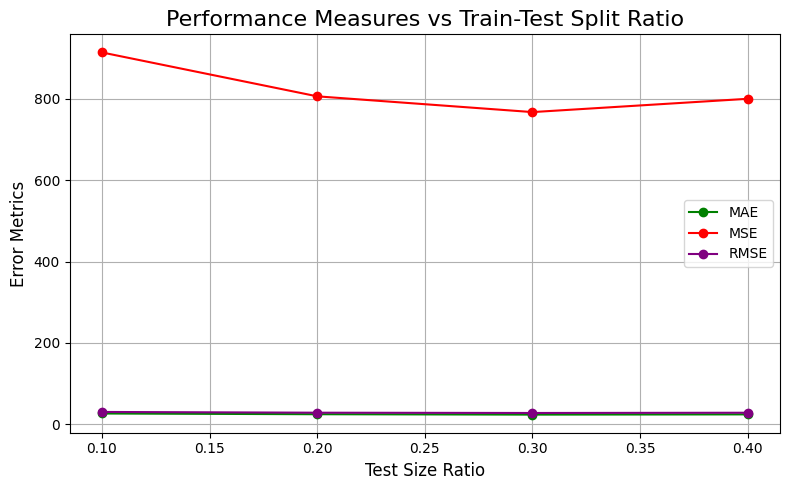

In [18]:
# Plot MAE, MSE, and RMSE vs Split Ratio
plt.figure(figsize=(8, 5))
plt.plot(results_df['Split Ratio'], results_df['MAE'], marker='o', linestyle='-', color='green', label='MAE')
plt.plot(results_df['Split Ratio'], results_df['MSE'], marker='o', linestyle='-', color='red', label='MSE')
plt.plot(results_df['Split Ratio'], results_df['RMSE'], marker='o', linestyle='-', color='purple', label='RMSE')
plt.title('Performance Measures vs Train-Test Split Ratio', fontsize=16)
plt.xlabel('Test Size Ratio', fontsize=12)
plt.ylabel('Error Metrics', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

MSE (red line) is much higher than the other metrics and changes slightly as the split ratio changes.
MAE (green line) and RMSE (purple line) stay low and almost constant, meaning the model's performance is stable for these metrics

# Model Comparison for Regression: Ridge, Lasso, and Linear Regression

Tuning Ridge...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters for Ridge: {'alpha': 100}
Best R-Squared for Ridge: -0.0176
Tuning Lasso...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters for Lasso: {'alpha': 100}
Best R-Squared for Lasso: -0.0125
R-Squared for Linear Regression: -0.0187


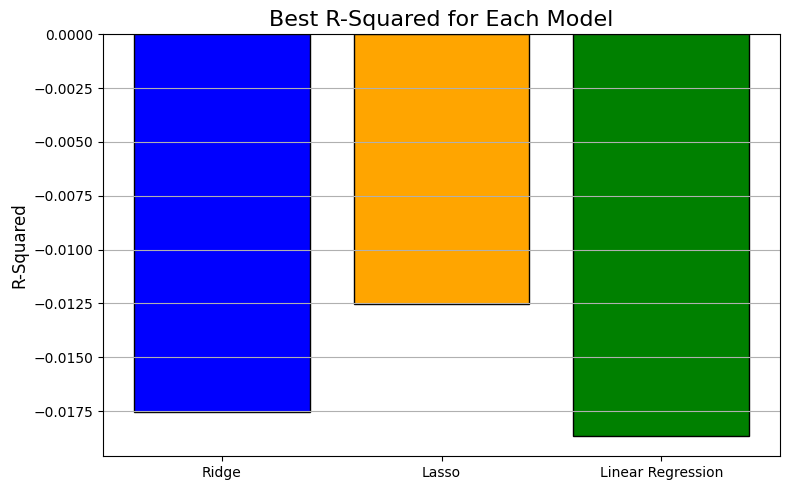

In [13]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Ridge and Lasso
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Regularization strengths

# Models to tune
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

# Store results
best_models = {}
best_scores = {}

# Perform GridSearchCV for each model
for name, model in models.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', verbose=1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    best_scores[name] = grid_search.best_score_
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Best R-Squared for {name}: {grid_search.best_score_:.4f}")

# Add Linear Regression separately
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_r2_score = r2_score(y_test, lr_model.predict(X_test))
best_models['Linear Regression'] = lr_model
best_scores['Linear Regression'] = lr_r2_score
print(f"R-Squared for Linear Regression: {lr_r2_score:.4f}")

# Visualize Best R-Squared Scores
plt.figure(figsize=(8, 5))
plt.bar(best_scores.keys(), best_scores.values(), color=['blue', 'orange', 'green'], edgecolor='black')
plt.title('Best R-Squared for Each Model', fontsize=16)
plt.ylabel('R-Squared', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


insights from Results:
Best Model Parameters:

Both Ridge and Lasso models performed best with an alpha value of 100, which means they favored stronger regularization.
Model Performance:

All models (Ridge, Lasso, and Linear Regression) had negative R-Squared values, meaning they did not fit the data well. This indicates that the models are not capturing the patterns in the data effectively.
Comparison:

Ridge and Lasso performed similarly, with very close R-Squared values.
Linear Regression performed the worst with the most negative R-Squared.

# Predictions on New Data Using Ridge Model

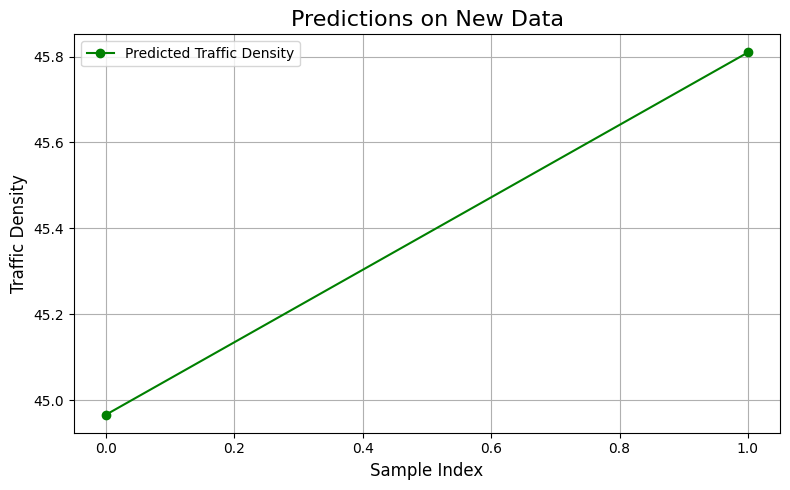

Predicted Traffic Density for New Data:
[44.96632308 45.80960117]


In [14]:
# New test data (example data, replace with actual data)
new_test_data = pd.DataFrame({
    'Year': [2025, 2025],
    'Month': [11, 11],
    'Day': [5, 20],
    'Hour': [10, 16],
    'Peak_Time_Hour': [1, 2],
    'Location_Encoded': [3, 5],
    'Object_Type_Asteroid Mining Ship': [0, 0],
    'Object_Type_Manned Spacecraft': [1, 0],
    'Object_Type_Satellite': [0, 1],
    'Object_Type_Scientific Probe': [0, 0],
    'Object_Type_Space Debris': [0, 0],
    'Object_Type_Space Station': [0, 1]
})

# Predict using the best Ridge model
ridge_model = best_models['Ridge']
new_predictions = ridge_model.predict(new_test_data)

# Visualize Predictions
plt.figure(figsize=(8, 5))
plt.plot(range(len(new_predictions)), new_predictions, marker='o', color='green', label='Predicted Traffic Density')
plt.title('Predictions on New Data', fontsize=16)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Traffic Density', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Predicted Traffic Density for New Data:")
print(new_predictions)


The Ridge model predicted traffic densities for the new data as [44.97, 45.81].
The predictions are quite close to each other, indicating similar traffic density values for the two samples.